## <center> Car Valuation Prediction </center>
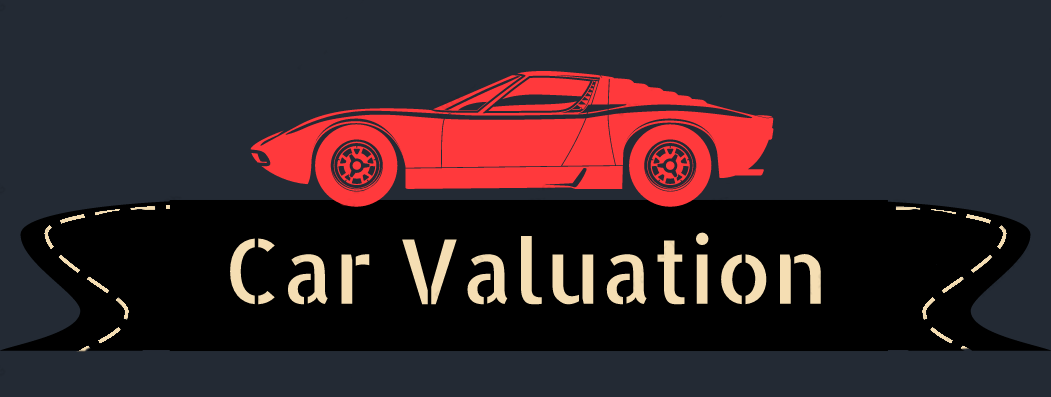
- The Car Valuation project is about predicting selling price of used cars
- In this datset i have 2040 unique cars
- my model can predict selling price of cars in INR
- I have used Gradient Boost algorithm gives 97.79% accuracy on training data set and 98.61% accuracy on testing data set, here data set was split on 80:20 ratio
- Here i have developed end to end application using Flask, Javascript, Bootstrap, CSS and HTML here's the full source code link <br>https://github.com/jaysoftic/car-valuation
- I have deployed this end to end project on AWS Elastic Beanstalk platform here's the live demo link <br>http://carvaluationprediction-env-1.eba-pvpbk242.us-east-2.elasticbeanstalk.com/

- - This notebook is about data analysis, feature engineering and model building

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams["figure.figsize"] = (10, 6)

In [ ]:
main_data = pd.read_csv("../input/vehicle-dataset-from-cardekho/Car details v3.csv")

In [ ]:
main_data.shape

## EDA

In [ ]:
main_data.isna().sum()

In [ ]:
main_data.engine.unique()

In [ ]:
main_data.mileage.unique()

In [ ]:
main_data.seats.unique()

In [ ]:
# seats, torque and max_power features are not necessary so let's drop it

main_data.drop(columns = ["seats", "torque", "max_power"], inplace=True)

In [ ]:
# For now let's make NaN value as 0 in mileage and engine column

main_data.fillna(0, inplace=True)

In [ ]:
# let's see the data where mileage value and engine values are 0

main_data.loc[main_data.mileage == 0].head(5)

- we can see that Car company and name are same but car version are differnce
- we can replace that 0 mileage value with mean value of same care name's mileage value
- we can replace that 0 engine value with median value of same care name's engine value

In [ ]:
# let's split the numeric values from mileage and engine and convert it into float or int

main_data.mileage = main_data.mileage.apply(lambda x: float(str(x).split()[0]))
main_data.engine = main_data.engine.apply(lambda x: int(str(x).split()[0]))
main_data.sample(2)

In [ ]:
# let's separate company and car name from name column

main_data["comp_car_name"] = main_data.name.apply(lambda x: str(x).split()[0] + " " + str(x).split()[1])
main_data.sample(2)

In [ ]:
# let's check how many records have 0 mileage values

len(main_data.loc[main_data.mileage == 0])

In [ ]:
# now let's fill the mileage value with mean value of same car name's mileage values wherever it has 0 value

dropable_index = []
for i in main_data.loc[main_data.mileage == 0].index:
    missing_mileage_car_name = main_data.loc[i, "comp_car_name"]
    avg_mileage = main_data.loc[(main_data.name.str.contains(missing_mileage_car_name)) & (main_data.mileage !=0), "mileage"].mean()
    if np.nan is avg_mileage:
        # here if mean value is nan then it means in our data set there are no other same company name car available
        # so for that we have one option we have to drop that records
        dropable_index.append(i)
    else:
        main_data.loc[i, "mileage"] = avg_mileage

# let's drop those records which i did not able to fill the mileage value because that car name was unique
main_data.drop(dropable_index, axis=0, inplace=True)
main_data.sample(3)

In [ ]:
# let's see how many records have 0 value in engine column

len(main_data.loc[main_data.engine == 0])

In [ ]:
# now let's fill the engine value with median value of same car name's engine value wherever engine value is 0

for i in main_data.loc[main_data.engine == 0].index:
    missing_engine_car_name = main_data.loc[i, "comp_car_name"]
    median_engine = main_data.loc[(main_data.name.str.contains(missing_engine_car_name)) & (main_data.engine != 0), "engine"].median()
    
    main_data.loc[i, "engine"] = median_engine

main_data.sample(3)

In [ ]:
# let's see how many records are remaining with 0 engine value

len(main_data.loc[main_data.engine == 0])

###  Exploring Name Feature

In [ ]:
# let's find unique values of name columns

main_data.name.nunique()

##### Observation:
- we have 2058 unique cars

### Exploring Years Feature

In [ ]:
# let's find unique values of year columns

main_data.year.unique()

In [ ]:
# let's plot it using count plot it see the variation of years
sns.countplot(main_data.year)
plt.xticks(rotation=90)
plt.show()

##### Observation:
- We have cars from year 1983 to 2020

### Exploring Km Driven Feature

In [ ]:
# let's see the data distribution of km_driven

sns.distplot(main_data.km_driven)

In [ ]:
# let's see min and max value

print("Minimum Km Driven:", main_data.km_driven.min())
print("Maximum Km Driven:", main_data.km_driven.max())

##### Observation:
- Our Km Driven data is right skewed but it's okay some cars are old so it driven more than lac KM

### Exploring Fuel Feature

In [ ]:
# let's see the variation of fuel type

sns.countplot(main_data.fuel)
plt.title("Count of Fuel Type")
plt.show()

In [ ]:
# Let's find avg price of the car according to it's fuel type

avg_fuel_selling_price = main_data.groupby("fuel").selling_price.mean().reset_index()
sns.barplot(avg_fuel_selling_price.fuel, avg_fuel_selling_price.selling_price)
plt.title("Average Selling Price base on Fuel Type")
plt.show()

##### Observation:
- Maximum cars are run on Diesel and Petrol fuel and some are on LPG and CNG
- The cars which has Diesel fuel type it's selling price is high 
- so Fuel type is affect to selling price

### Exploring Seller Type Feature

In [ ]:
# let's look at seller_type 

sns.countplot(main_data.seller_type)
plt.title("Count of Seller Type")
plt.show()

In [ ]:
# let's see seller_type feature affect on selling price or not

avg_seller_type_selling_price = main_data.groupby("seller_type").selling_price.mean().reset_index()

sns.barplot(avg_seller_type_selling_price.seller_type, avg_seller_type_selling_price.selling_price)
plt.title("Average Selling Price base on Seller Type")
plt.show()

##### Observation:
- Individual Sellers are high than Dealer and Tustmark Delaer
- Selling Price is high when seller type are Dealer and Trustmark Dealer
- so Seller Type affect to Selling Price

### Exploring Transmission Feature

In [ ]:
# let's look at transmission types

sns.countplot(main_data.transmission)
plt.title("Count of Transmission")
plt.show()

In [ ]:
# let's see the average selling price manual and automatic transmission

avg_transmission_selling_price = main_data.groupby("transmission").selling_price.mean().reset_index()

sns.barplot(avg_transmission_selling_price.transmission, avg_transmission_selling_price.selling_price)
plt.title("Average Selling Price base on Transmission")
plt.show()

##### Observation:
- We have more cars which have a manual transmission compare to automatic transmission
- The Selling price of an automatic transmission are high than manual transmission
- so here transmission types are affect to selling price

### Exploring Owner Feature

In [ ]:
# let's look at owner category

sns.countplot(main_data.owner)
plt.title("Count of Owner")
plt.show()

In [ ]:
# let's see the average selling price base on owner

avg_owner_selling_price = main_data.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

In [ ]:
# Average selling price of owner type test drive car is very high it might be an outlier let's see the data
# which have owner type is Test Drive Car

main_data.loc[main_data.owner == "Test Drive Car"]

In [ ]:
main_data.loc[main_data.name == "Volkswagen Vento 1.5 TDI Highline BSIV"]

- Here we can see the cars which belongs to Test Drive Car category of owner are unique models
- Owner Type Test Drive Car are 5 records and 3 unique model so we can easily drop it to remove that outlier

In [ ]:
# let's drop records which has Test Drive Car owner type

main_data.drop(main_data.loc[main_data.owner == "Test Drive Car"].index, axis=0, inplace=True)

In [ ]:
# now again let's see the average selling price base on owner

avg_owner_selling_price = main_data.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

##### Observation:
- We have more cars from first owner
- The car selling price is more when owner is first compare to other owner
- so here owner feature is affect to selling price

### Exploring Mileage Feature

In [ ]:
# let's look the data distribution of mileage column

sns.distplot(main_data.mileage)
plt.show()

##### Observation:
- Here mileage data are noramlly distributed so our regression model will perform better on normal distribution data
- Mileage feature is important for car so it is affect on selling price

### Exploring Engine Feature

In [ ]:
# let's look at engine

sns.distplot(main_data.engine)
plt.show()

In [ ]:
main_data[["engine", "selling_price"]].corr()

##### Observation:
- The data of engine is not normally distributed but engine size is really matter for car
- We can see engine is highly co-relates with selling price

### Exploring Target Feature

In [ ]:
# let's look at the data distribution of selling_price

sns.distplot(main_data.selling_price)
plt.show()

- Selling price data are distributed in righ skewed, there may be chance of outliers let's try to find it

In [ ]:
# finding upper and lower limit using percertile 
# here i'm going to use 99.9% for upper limit and 0.1% for lower limit

lower_limit = main_data.selling_price.quantile(0.001)
upper_limit = main_data.selling_price.quantile(0.999)

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

In [ ]:
# let's see the data which are below the range of lower limit

main_data.loc[main_data.selling_price < lower_limit]

In [ ]:
# let's see the data which are below the limit of upper limit

main_data.loc[main_data.selling_price > upper_limit]

In [ ]:
main_data.selling_price.describe()

##### Observation:
- Here selling price data are not normally distributed it's right skewed because most of the car price are high
- Lower selling price is 29999 of maruti car and Higher price is 10000000 of Volvo car these are normal it's not an outlier

## Feature Engineering

In [ ]:
# let's do target guided label encoding for name columns

car_name_encoded = main_data.groupby("name").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting name and index value into dict using zip then map it with origial series
main_data.name = main_data.name.map(dict(zip(car_name_encoded.name, car_name_encoded.index)))
main_data.sample(3)

In [ ]:
# let's do target guided label encoding for fuel type bcz diesel cars has high price compare to other

fuel_encoded = main_data.groupby("fuel").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting fuel and index value into dict using zip then map it with original series
main_data.fuel = main_data.fuel.map(dict(zip(fuel_encoded.fuel, fuel_encoded.index)))
main_data.sample(3)

In [ ]:
# let's encode seller_type using target guided encoding

seller_type_encoded = main_data.groupby("seller_type").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# creating dict using enumerator and key as count value and value as seller_type_encoded value then map it with original series
main_data.seller_type = main_data.seller_type.map({k:v for v, k in enumerate(seller_type_encoded.seller_type, 0)})
main_data.sample(3)

In [ ]:
# let's encode transmission using one hot encoding
# in transmission column we have two values Manual and Automatic

transmission_encoded = pd.get_dummies(main_data.transmission, prefix="transmission", drop_first=True)
# here droping first value to prevent dummy variable trap, first value was Automatic so 0 will represent that value

# let's concat encoded transmission series with main_data data frame

main_data = pd.concat([main_data, transmission_encoded], axis=1)
main_data.sample(3)

In [ ]:
# let's split owner value and encode it according to it's number

main_data.owner = main_data.owner.apply(lambda x: str(x).split()[0])

# now let's do label encoding

main_data.owner = main_data.owner.map({"First": 1, "Second": 2, "Third": 3, "Fourth": 4})
main_data.sample(3)

In [ ]:
# let's drop transission and comp_car_name and make a final_data data frame

final_data = main_data.drop(columns = ["transmission", "comp_car_name"]).copy()

In [ ]:
final_data.sample(3)

In [ ]:
# let's create feature matrix X and target vector y

X = final_data.drop(columns="selling_price")
y = final_data.selling_price

In [ ]:
sns.distplot(y)

In [ ]:
# let's split the data into train and test data set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

### Model Building

#### Model training using following algorithms
- linear regression
- ridge regression
- lasso regression
- decision tree
- random forest
- ada boost
- gradient boost
- xg boost

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0, 1, 0.01)
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": np.arange(0, 1, 0.01)
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["mse", "friedman_mse", "mae"],
            "splitter": ["best", "random"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]            
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "criterion": ["mse", "friedman_mse", "mae"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]
        }
    },
    "Ada Boost": {
        "model": AdaBoostRegressor(),
        "params": {
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "learning_rate": np.arange(0, 1, 0.01),
            "loss": ['linear', 'square', 'exponential']
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingRegressor(),
        "params": {
            "learning_rate": np.arange(0, 1, 0.01),
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "criterion": ['friedman_mse', 'mse', 'mae'],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "max_features": ["auto", "log2", "sqrt", None],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "alpha": np.arange(0, 1, 0.01)
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

start_time = time.time()
best_model = {}
best_model_details = []

for model_name, values in algos.items():
    rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=10, n_jobs=-1, verbose=2, random_state=4)
    rscv.fit(X_train, y_train)
    best_model[model_name] = rscv
    best_model_details.append({"Model Name": model_name, "Best Score": rscv.best_score_, "Best Parameters": rscv.best_params_})


print("--------------------------------------------------------")
print(f"it takes {(time.time() - start_time) / 60} minutes")
print("--------------------------------------------------------")

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

In [ ]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(X_test, y_test)})

pd.DataFrame(test_model)


In [ ]:
# Gradient Boost work better here, let's make it as final model

final_model = best_model["Random Forest"]

#let's find out mean square error, root mean square error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)


##### Observation:
- I got around 98% accuracy but RMSE is 105790 and MAE is 49412
- so on an average i will get 49412 error from this model
- I got huge error because target value is also high it is around 50-80 lakhs

In [ ]:
import pickle
# let's save models and appropriate encoding files, it will help me to predict on web app

# let's save encoded data frame as csv files, if save it in json format it will take more memory than csv file
car_name_encoded.to_csv("car_name_encoded.csv", index=False)
fuel_encoded.to_csv("fuel_encoded.csv", index=False)
seller_type_encoded.to_csv("seller_type.csv", index=False)

# let's save the model into pickle file
with open("car_price_model.pickle", "wb") as f:
    pickle.dump(final_model, f)